# EDA on Spotify Top 200 Charts

## Importing Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
sns.set()
plt.style.use('seaborn-whitegrid')

## Loading and Preprocessing Data

In [2]:
# load csv data
df = pd.read_csv('spotify_dataset.csv')

# clean data - remove rows with blank data
df = df.replace(' ', np.nan)
df = df.replace('[]', np.nan)
df.dropna(inplace=True)

# preprocess data
df['Streams'] = df['Streams'].str.replace(',','')

cols_to_convert = ['Streams', 'Artist Followers', 'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric)

# df.info()

## Histograms


### Popularity
The histogram is **skewed to the left**. The popularity scores of the songs tend to be 60 and above.
***

### Danceability
The histogram is **skewed to the left**. Most songs in the dataset have a danceability measure of 0.5 and above, with a few instances of songs with danceability measure less than 0.5.

***

### Energy
The histogram is **skewed to the left**. Most songs in the dataset have an energy measure of 0.5 and above (meaning that the songs are determined to be fast, loud, and noisy), with a few instances of songs with energy measure less than 0.5.

***

### Loudness
The histogram is **skewed to the left**. Most songs in the dataset have a loudness measure of -10 decibels (dB) and above, with a few instances of songs with energy measure less than -10 decibels.

***

### Speechiness
The histogram is **skewed to the right**. Majority of the songs have little to no speechiness. All the songs in the dataset have less than 0.6 speechiness measure.

***

### Acousticness
The histogram is **skewed to the right**. Majority of the songs are not purely acoustic.

***

### Tempo
The histogram is **multimodal**. There is no specific tempo that the majority of the songs lean towards.

***

### Duration
The histogram is **symmetric / bell-shaped**. The durations of the songs follow the curve of a normal distribution. The mean, median, and mode are centrally located and are somewhat near the midline. Therefore, majority of the songs have a duration of about 200000 ms (or 3 minutes and 20 seconds).

***

### Valence
The illustrated histogram is **symmetric / bell-shaped**. The valences of the songs follow the curve of a normal distribution. The mean, median, and mode are centrally located and are somewhat near the midline. Therefore, majority of the songs have neutral valences.

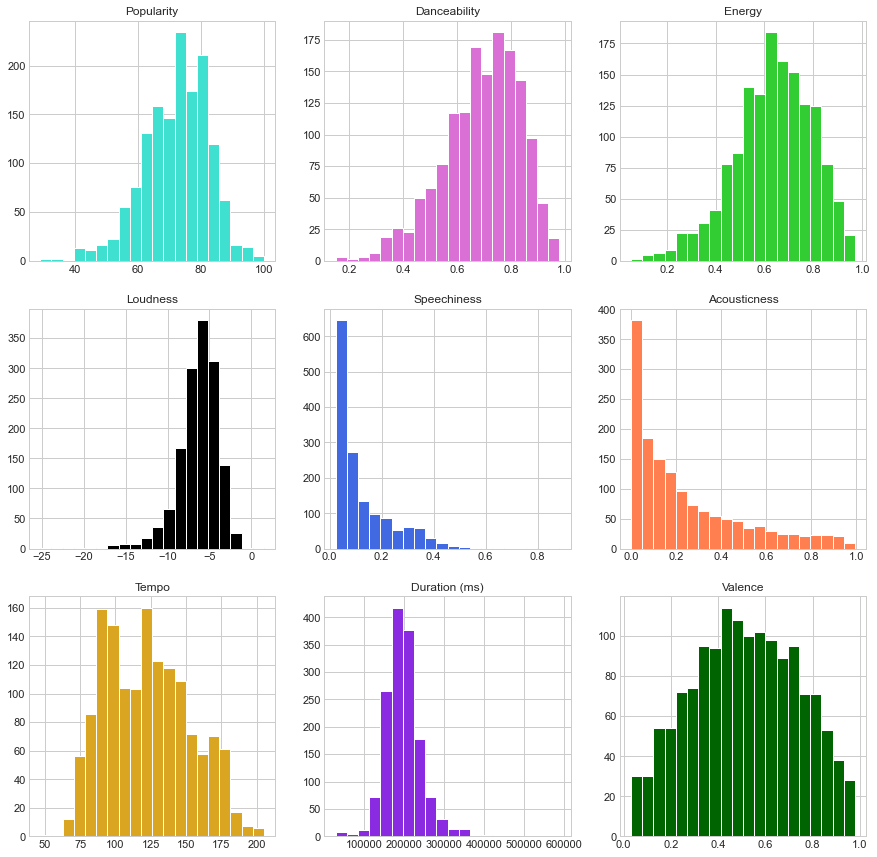

In [3]:
# histograms for features

# set plot size
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(3, 3, 1)
plt.hist(df['Popularity'], bins=20, color='turquoise')
plt.title('Popularity')

plt.subplot(3, 3, 2)
plt.hist(df['Danceability'], bins=20, color='orchid')
plt.title('Danceability')

plt.subplot(3, 3, 3)
plt.hist(df['Energy'], bins=20, color='limegreen')
plt.title('Energy')

plt.subplot(3, 3, 4)
plt.hist(df['Loudness'], bins=20, color='black')
plt.title('Loudness')

plt.subplot(3, 3, 5)
plt.hist(df['Speechiness'], bins=20, color='royalblue')
plt.title('Speechiness')

plt.subplot(3, 3, 6)
plt.hist(df['Acousticness'], bins=20, color="coral")
plt.title('Acousticness')

plt.subplot(3, 3, 7)
plt.hist(df['Tempo'], bins=20, color='goldenrod')
plt.title('Tempo')

plt.subplot(3, 3, 8)
plt.hist(df['Duration (ms)'], bins=20, color='blueviolet')
plt.title('Duration (ms)')

plt.subplot(3, 3, 9)
plt.hist(df['Valence'], bins=20, color='darkgreen')
plt.title('Valence')

plt.show()

# reset plot defaults
plt.rcParams.update(plt.rcParamsDefault)
sns.set()
plt.style.use('seaborn-whitegrid')

***
## Relationship Between the Number of Times a Song Charted and Its Streaming Numbers
The top 50 songs that charted the most are listed for reference below.

A scatter plot was generated to show the relationship between the number of times a song charted and its streaming numbers. It can be seen in the scatter plot that most of the songs that had charted received less than 20 million streams. It must also be considered that the data is not time-series data, so older data are no longer updated since they were last entered into the dataset. There seems to be no specific pattern to how the plots were placed, which implies little correlation between the two. 

In [4]:
# top 20 songs that charted the most times
df.sort_values('Number of Times Charted', ascending=False).head(10)

Index  Highest Charting Position  Number of Times Charted  \
368    369                          5                      142   
92      93                          6                       84   
69      70                         12                       83   
106    107                          3                       83   
132    133                          4                       83   
119    120                         99                       83   
117    118                          9                       83   
34      35                          4                       83   
110    111                         46                       83   
103    104                         88                       83   

    Week of Highest Charting              Song Name   Streams  \
368   2019-12-27--2020-01-03                Falling   5294368   
92    2019-12-27--2020-01-03                Circles   7156162   
69    2019-12-27--2020-01-03      Someone You Loved   8490162   
106   2020-06-19--2020-06-26  Roses - Imanbek Remix   6653690   
132   2019-12-27--2020-01-03               Memories   5928329   
119   2020-07-24--2020-07-31                Perfect   6278765   
117   2019-12-27--2020-01-03               Señorita   6317487   
34    2020-07-31--2020-08-07       Watermelon Sugar  11996689   
110   2020-04-17--2020-04-24   lovely (with Khalid)   6569547   
103   2020-06-26--2020-07-03               Believer   6699895   

                           Artist  Artist Followers                 Song ID  \
368                  Harry Styles          16112621  1ZMiCix7XSAbfAJlEZWMCp   
92                    Post Malone          33651775  21jGcNKet2qwijlDFuPiPb   
69                  Lewis Capaldi           8384096  7qEHsqek33rTcFNT9PFqLf   
106                     SAINt JHN            742692  0zLCBJZSiELJf02ucPP9wb   
132                      Maroon 5          32262679  4cktbXiXOapiLBMprHFErI   
119                    Ed Sheeran          83293380  0tgVpDi06FyKpA1z0VMD4v   
117  Shawn Mendes, Camila Cabello          33879560  0TK2YIli7K1leLovkQiNik   
34                   Harry Styles          16112621  6UelLqGlWMcVH1E5c4H7lY   
110                 Billie Eilish          47014200  0u2P5u6lvoDfwTYjAADbn4   
103               Imagine Dragons          35285425  0pqnGHJpmpxLKifKRmU6WP   

                                                 Genre  ... Danceability  \
368                           ['pop', 'post-teen pop']  ...        0.567   
92                   ['dfw rap', 'melodic rap', 'rap']  ...        0.695   
69                                   ['pop', 'uk pop']  ...        0.501   
106  ['melodic rap', 'pop rap', 'rap', 'slap house'...  ...        0.769   
132                                ['pop', 'pop rock']  ...        0.775   
119                                  ['pop', 'uk pop']  ...        0.599   
117  ['canadian pop', 'dance pop', 'pop', 'post-tee...  ...        0.759   
34                            ['pop', 'post-teen pop']  ...        0.548   
110                              ['electropop', 'pop']  ...        0.351   
103                     ['modern rock', 'pop', 'rock']  ...        0.776   

    Energy  Loudness  Speechiness  Acousticness  Liveness    Tempo  \
368  0.267    -6.502       0.0299        0.8390    0.0890  110.011   
92   0.762    -3.497       0.0395        0.1920    0.0863  120.042   
69   0.405    -5.679       0.0319        0.7510    0.1050  109.891   
106  0.719    -5.472       0.0474        0.0143    0.3590  121.955   
132  0.327    -7.241       0.0557        0.8410    0.0821   91.050   
119  0.448    -6.312       0.0232        0.1630    0.1060   95.050   
117  0.540    -6.039       0.0287        0.0370    0.0945  116.947   
34   0.816    -4.209       0.0465        0.1220    0.3350   95.390   
110  0.296   -10.109       0.0333        0.9340    0.0950  115.284   
103  0.780    -4.374       0.1280        0.0622    0.0810  124.949   

     Duration (ms)  Valence  Chord  
368         240133   0.0592      E  
92        

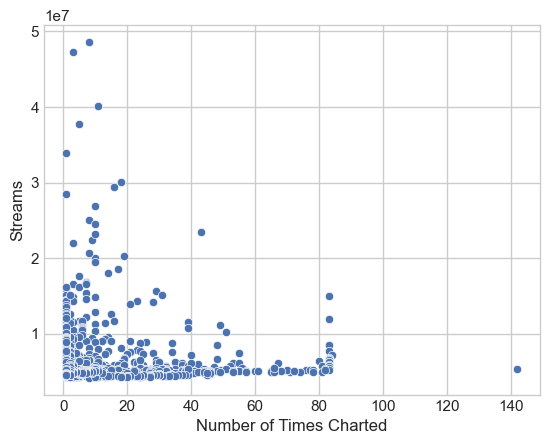

In [5]:
# scatter plot: number of weeks charted, number of streams
sns.scatterplot(data=df, x="Number of Times Charted",y="Streams")
plt.show()

***
## Danceability of Number 1 Songs

All in all, there are 18 songs in the data set that peaked at \#1 in the Spotify Top 200 Charts. The danceability of the songs that charted at \#1 are plotted in a scatter plot to determine a pattern among the songs. The scatter plot shows that all songs (except one outlier) have a danceability measure of **over 0.5** . More than half of the songs have a danceability measure of **0.7 and above** . 

In [6]:
# all songs that charted #1
songs_number_ones = df.loc[df['Highest Charting Position'] == 1]
songs_number_ones[songs_number_ones.columns[0]].count()

18

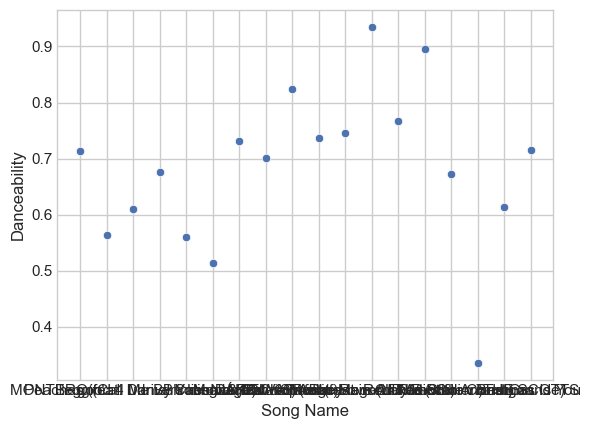

In [7]:
# scatter plot: number 1 songs, danceability, Highest Charting Position
sns.scatterplot(data=songs_number_ones, x="Song Name",y="Danceability")
plt.show()

***
## Relationship Between the Number of Times an Artist Appears in the Spotify Top 200 Charts and Their Streaming Numbers

To check for this relationship, a new dataframe was declared to have more concise data. The dataframe consists of the artists (unique), the number of times they appeared on the Spotify Top 200 Charts, and the total number of streams they acquired in the charts.

A bar chart of the top 10 artists with the most appearances in the Spotify Top 200 Charts is shown below. The bar chart shows the concrete number of streams an artist has in relation to the number of appearances they have.

A linear regression was also calculated to show the correlation between the two. The linear regression is given by $ y = (1.3\times10^{-7})x + 0.3 $. The coefficient of determination ($R^{2}$) is approximately 0.95246, meaning 95.25% of the number of times an artist shows up in the charts can be attributed to their streaming numbers. Therefore, there is a very strong correlation between an artist's streaming numbers and the number of times they appear in the charts.

In [8]:
# artists who appeared in the charts and how many times, along with streaming
artist_appearance = df.groupby('Artist').size().reset_index(name='count')
artist_appearance = artist_appearance.sort_values('count', ascending=False)
artists = artist_appearance['Artist'].tolist()
artist_streams = list()

for artist in artists:
    artist_streams.append(df.loc[df['Artist'] == artist, 'Streams'].sum())

artist_appearance['Streams'] = artist_streams
artist_appearance['Label'] = artist_appearance['Artist'] + " (" + artist_appearance['count'].astype('str') + ')'
artist_appearance

Artist  count    Streams  \
597                             Taylor Swift     52  381480455   
367                             Lil Uzi Vert     32  208822039   
295                               Juice WRLD     30  166703004   
299                            Justin Bieber     30  214462424   
52                                       BTS     29  238400020   
..                                       ...    ...        ...   
246                        Israel & Rodolffo      1    5011753   
245  Internet Money, Gunna, Don Toliver, NAV      1   11373347   
244                    Internet Money, Diplo      1    4628159   
241                             Idina Menzel      1    8160534   
667                                twocolors      1    4439790   

                                           Label  
597                            Taylor Swift (52)  
367                            Lil Uzi Vert (32)  
295                              Juice WRLD (30)  
299                           Justin Bieber (30)  
52                                      BTS (29)  
..                                           ...  
246                        Israel & Rodolffo (1)  
245  Internet Money, Gunna, Don Toliver, NAV (1)  
244                    Internet Money, Diplo (1)  
241                             Idina Menzel (1)  
667                                twocolors (1)  

[668 rows x 4 columns]

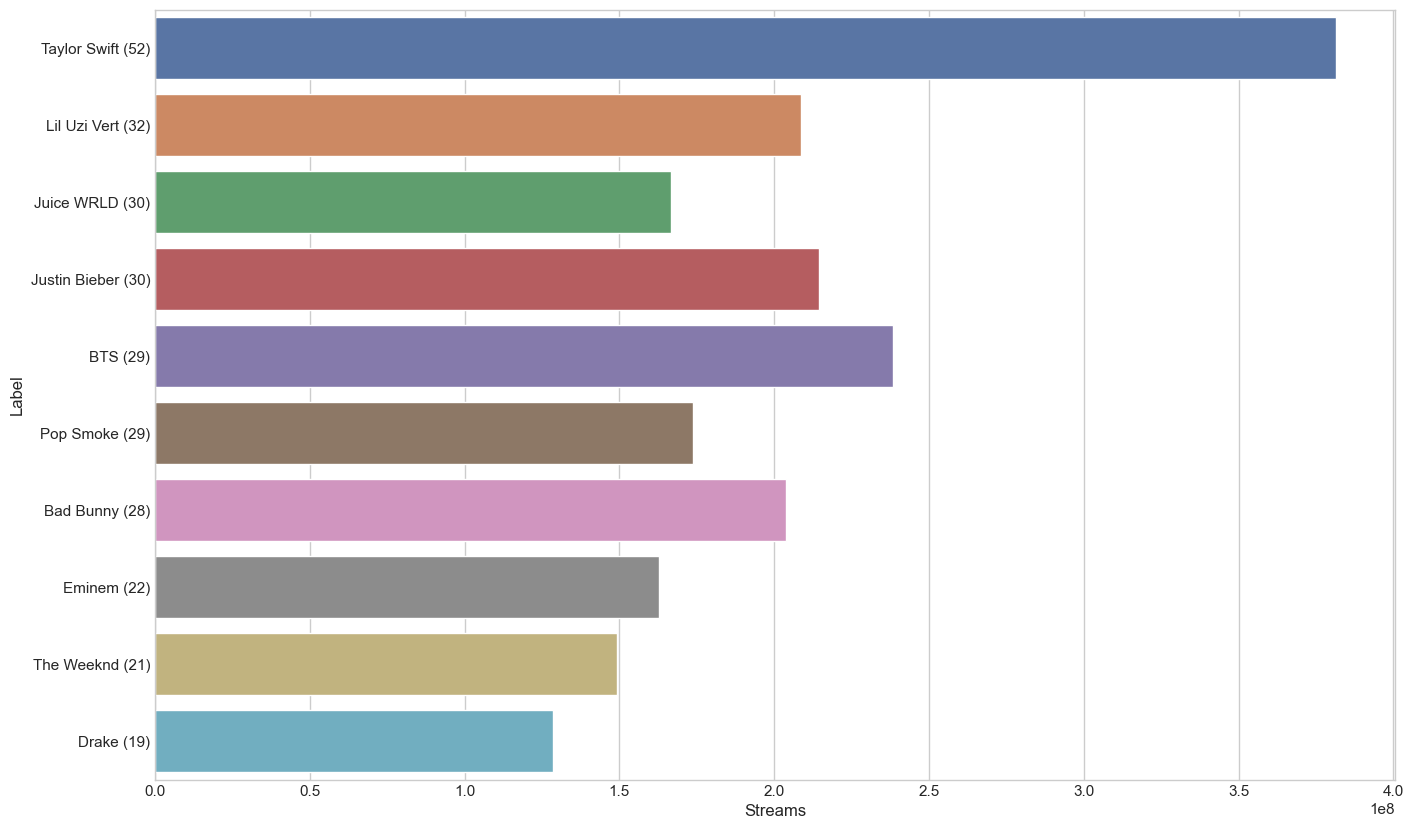

Slope: 1.3528300847146887e-07
Intercept:  0.30704829368901043
Linear regression equation y = 0.0x + 0.3
Coefficient of determination (R^2): 0.9524696453305913


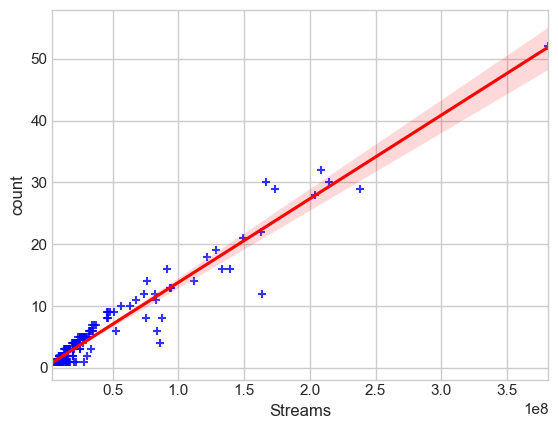

In [9]:
# bar plot: number of times charted, number of streams
sns.barplot(data=artist_appearance.head(10), y="Label",x="Streams")
plt.gcf().set_size_inches(16, 10)
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(artist_appearance['Streams'],artist_appearance['count'])

print('Slope:', slope)
print('Intercept: ', intercept)
print('Linear regression equation', r'y = {0:.1f}x + {1:.1f}'.format(slope,intercept))
print('Coefficient of determination (R^2):', r_value ** 2)

sns.regplot(x=artist_appearance['Streams'], y=artist_appearance['count'], color='blue', marker='+', line_kws={'color':'red'})
plt.show()

***
## Relationship Between an Artist's Follower Count and Their Streams

A new dataframe was introduced, containing only using the artist name (unique), artist followers, and the sum of all the streams they have within the dataset. The dataframe is sorted in ascending order according to the number of followers an artist has.

The scatter plot indicates an artist's reach by showing the relationship between their follower count and their streams. The scatter plot is seen to be random, meaning not much pattern can be garnered from the two variables. The linear regression is given by $ y = 0.9x + 6876193.7 $. The coefficient of determination ($R^{2}$) is approximately 0.11, meaning only 11% of the variance in an artist's streaming numbers can be explained by their follower count. Therefore, there is little correlation between an artist's follower count and streaming numbers.

In [10]:
# artists according to streams and followers count
streams = list()

followers = df[['Artist', 'Artist Followers']]
followers = followers.drop_duplicates(subset='Artist', keep='last')
artists = followers['Artist']

for artist in artists:
    streams.append(df.loc[df['Artist'] == artist, 'Streams'].sum())

followers['Streams'] = streams
followers = followers.sort_values('Artist Followers', ascending=True)
# followers

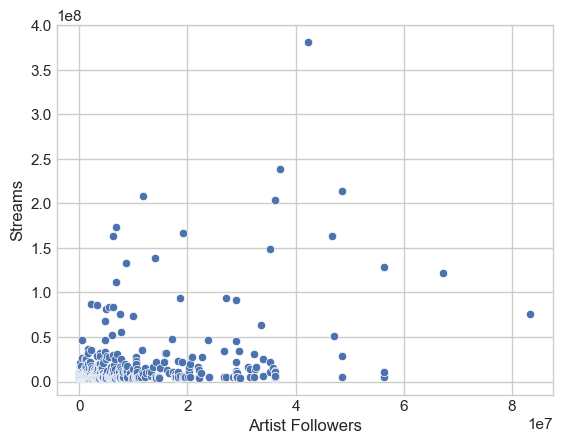

In [11]:
# scatter plot: artist (according to follower count), streams
sns.scatterplot(data=followers, x="Artist Followers",y="Streams")
plt.show()

Slope: 0.8700944977889563
Intercept:  6876193.732425489
Linear regression equation y = 0.9x + 6876193.7
Coefficient of determination (R^2): 0.11120708893797364


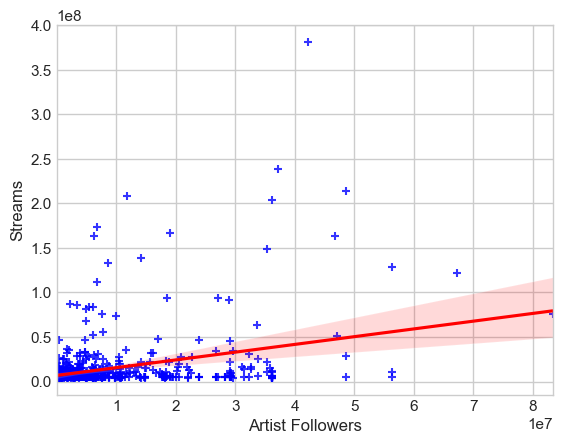

In [12]:
# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(followers['Artist Followers'],followers['Streams'])

print('Slope:', slope)
print('Intercept: ', intercept)
print('Linear regression equation', r'y = {0:.1f}x + {1:.1f}'.format(slope,intercept))
print('Coefficient of determination (R^2):', r_value ** 2)

sns.regplot(x=followers['Artist Followers'], y=followers['Streams'], color='blue', marker='+', line_kws={'color':'red'})
plt.show()


## Releationship of Streaming Numbers Between Valence and Danceability

### Streaming Numbers and Valence
Valency is described as the musical positiveness conveyed by a track (0 being least positive, and 1 being most positive). The relationship between streaming numbers and valency is checked by performing a linear regression test. It can be seen that the coefficient of determination ($R^{2}$) is approximately 0.001, meaning only 0.1% of the streaming numbers in the  can be explained by valence. Therefore, there is almost no correlation between a song's valence and its streaming count.

### Streaming Numbers and Danceability
Valency is described as the musical positiveness conveyed by a track (0 being least positive, and 1 being most positive). The relationship between streaming numbers and valency is checked by performing a linear regression test. It can be seen that the coefficient of determination ($R^{2}$) is approximately 0.007, meaning only 0.7% of the streaming numbers in the  can be explained by danceability. Therefore, there is almost no correlation between a song's danceability and its streaming count.

Slope: 512630.4420914298
Intercept:  6098302.119296007
Linear regression equation y = 512630.4x + 6098302.1
Coefficient of determination (R^2): 0.0011330728770723964


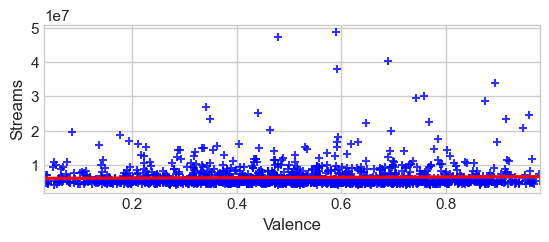

-------------
Slope: -2092294.900236461
Intercept:  7806246.681766518
Linear regression equation y = -2092294.9x + 7806246.7
Coefficient of determination (R^2): 0.007491936295296169


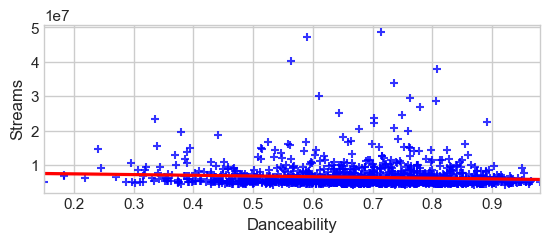

In [13]:
# linear regression: streams, valence: streams, danceability

plt.subplot(2, 1, 1)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Valence'],df['Streams'])
print('Slope:', slope)
print('Intercept: ', intercept)
print('Linear regression equation', r'y = {0:.1f}x + {1:.1f}'.format(slope,intercept))
print('Coefficient of determination (R^2):', r_value ** 2)

sns.regplot(y=df['Streams'], x=df['Valence'], color='blue', marker='+', line_kws={'color':'red'})
plt.show()

print('-------------')

plt.subplot(2, 1, 2)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Danceability'],df['Streams'])
print('Slope:', slope)
print('Intercept: ', intercept)
print('Linear regression equation', r'y = {0:.1f}x + {1:.1f}'.format(slope,intercept))
print('Coefficient of determination (R^2):', r_value ** 2)

sns.regplot(y=df['Streams'], x=df['Danceability'], color='blue', marker='+', line_kws={'color':'red'})
plt.show()